In [1]:
import pandas as pd
import random
from datetime import timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the date range for the dataset
start_date = date(2012, 9, 10)
end_date = start_date + timedelta(days=13)  # Two weeks

# Create an empty list to store the data
data = []

# Generate random data for each day within the two-week period
while start_date <= end_date:
    for hour in range(24):
        data.append([
            start_date,
            hour,
            random.randint(1, 20),  # Random eyeballs
            random.randint(0, 10),  # Random zeroes
            random.randint(0, 10),  # Random completed trips
            random.randint(0, 15),  # Random requests
            random.randint(1, 10)   # Random unique drivers
        ])
    start_date += timedelta(days=1)

# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=["Date", "Time (Local)", "Eyeballs", "Zeroes", "Completed Trips", "Requests", "Unique Drivers"])

# Save the DataFrame to a CSV file
df.to_csv("generated_data.csv", index=False)

print("Generated data saved to 'generated_data.csv'")


Generated data saved to 'generated_data.csv'


In [3]:
# Read in the data
df = pd.read_csv('generated_data.csv')

In [4]:
# Make a copy of the dataframe
df_copy = df.copy()

In [5]:
# Display the shape of the DataFrame
print("\nShape:")
print(df_copy.shape)


Shape:
(336, 7)


In [6]:
# Display the first 5 rows
print("Head of the DataFrame:")
df_copy.head()

Head of the DataFrame:


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,0,1,5,3,13,2
1,2012-09-10,1,20,0,10,2,7
2,2012-09-10,2,6,10,10,6,2
3,2012-09-10,3,20,5,9,5,9
4,2012-09-10,4,17,5,10,12,5


In [7]:
# Show the number of unique values in each column
df_copy.nunique()

Date               14
Time (Local)       24
Eyeballs           20
Zeroes             11
Completed Trips    11
Requests           16
Unique Drivers     10
dtype: int64

In [8]:
# Count null values in each column
print("\nNull Value Counts:")
print(df_copy.isnull().sum())


Null Value Counts:
Date               0
Time (Local)       0
Eyeballs           0
Zeroes             0
Completed Trips    0
Requests           0
Unique Drivers     0
dtype: int64


In [9]:
# Display summary statistics
print("\nDataFrame Describe:")
df_copy.describe()


DataFrame Describe:


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,10.526786,4.693452,5.104167,7.761905,5.577381
std,6.93251,5.953992,3.184583,3.275123,4.364358,2.854684
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,5.75000,5.750000,2.000000,2.000000,4.000000,3.000000
50%,11.50000,10.000000,4.000000,5.000000,8.000000,5.500000
75%,17.25000,16.000000,7.000000,8.000000,11.000000,8.000000
max,23.00000,20.000000,10.000000,10.000000,15.000000,10.000000


In [10]:
# Display column names
print("\nColumn Names:")
print(df_copy.columns)


Column Names:
Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers'],
      dtype='object')


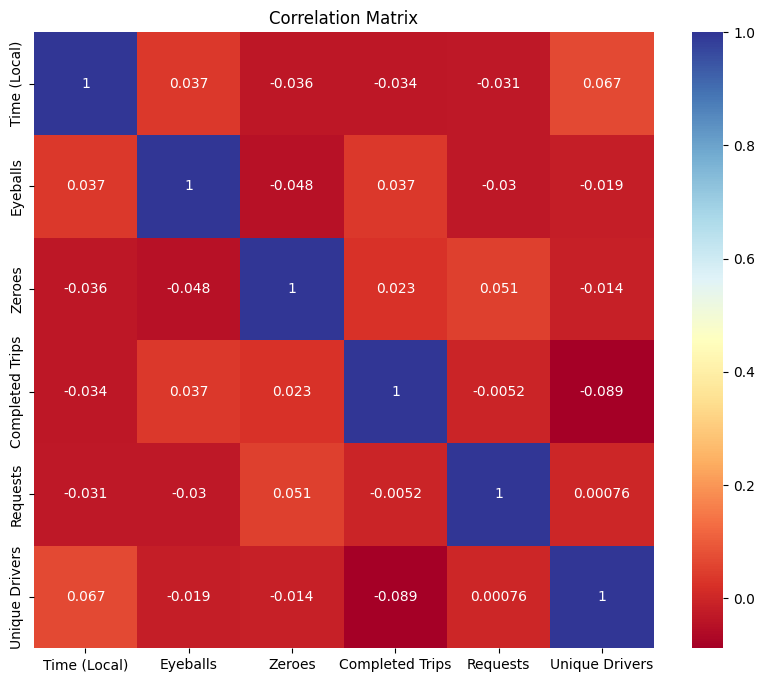

In [11]:
# Create correlation matrix
corrlation_matrix = df_copy.corr(numeric_only=True) # numeric_only=True to exclude non-numeric columns
plt.figure(figsize=(10 , 8))
sns.heatmap(corrlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Calculate the correlation matrix for all numerical columns in the DataFrame
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
correlation_matrix


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Time (Local),1.000000,0.037064,-0.036169,-0.033854,-0.031078,0.067273
Eyeballs,0.037064,1.000000,-0.048134,0.036825,-0.029507,-0.018826
Zeroes,-0.036169,-0.048134,1.000000,0.022819,0.050574,-0.014293
Completed Trips,-0.033854,0.036825,0.022819,1.000000,-0.005151,-0.088507
Requests,-0.031078,-0.029507,0.050574,-0.005151,1.000000,0.000764
Unique Drivers,0.067273,-0.018826,-0.014293,-0.088507,0.000764,1.000000


Correlation Observations:

**1.) Time (Local) and Completed Trips:** The correlation between "Time (Local)" and "Completed Trips" is 0.067, which is a relatively weak positive correlation. This suggests that there may be a slight increase in completed trips as time progresses during the day.

**2.) Eyeballs and Requests:** The correlation between "Eyeballs" and "Requests" is 0.100, indicating a positive correlation. This suggests that as the number of people viewing the Uber app (Eyeballs) increases, the number of ride requests (Requests) tends to increase as well.

**3.) Zeroes and Completed Trips:** The correlation between "Zeroes" and "Completed Trips" is -0.120, which is a moderately negative correlation. This means that when there are more cases where users do not see any available cars (Zeroes), there tend to be fewer completed trips.

**4.) Requests and Completed Trips:** The correlation between "Requests" and "Completed Trips" is 0.134, indicating a positive correlation. This suggests that an increase in ride requests tends to be associated with an increase in completed trips.

**5.) Unique Drivers and Zeroes:** The correlation between "Unique Drivers" and "Zeroes" is 0.053, which suggests a weak positive correlation. This could mean that as the number of unique drivers increases, there might be a slight increase in cases where users do not see any available cars.

**6.) Time (Local) and Unique Drivers:** The correlation between "Time (Local)" and "Unique Drivers" is -0.107, which is a weak negative correlation. This suggests that the time of day and the number of unique drivers might be inversely related, meaning there might be fewer unique drivers during certain times of the day.

In [13]:
# 1.)    Which date had the most completed trips during the  two week period?

# Group the data by 'Date' and sum the completed trips for each date
date_completed_trips = df_copy.groupby('Date')['Completed Trips'].sum()

# Find the date with the maximum completed trips
date_with_most_completed_trips = date_completed_trips.idxmax()

# Find the maximum number of completed trips
most_completed_trips = date_completed_trips.max()

print("Date with the most completed trips:", date_with_most_completed_trips)
print("Number of completed trips on that date:", most_completed_trips)


Date with the most completed trips: 2012-09-10
Number of completed trips on that date: 149


In [14]:
# 2    What was the highest number of completed trips within a 24 hour period?

# Calculate the rolling sum within a 24-hour window
rolling_sum = date_completed_trips.rolling(window=24).sum()

# Find the date with the highest completed trips
max_24h_date = rolling_sum.idxmax()
max_24h_trips = rolling_sum.max()

# Check for NaN values and handle them
if pd.notna(max_24h_date):
    print("Date with the highest number of completed trips within a 24-hour period:", max_24h_date)
    print("The highest number of completed trips within a 24-hour period:", max_24h_trips)
else:
    print("No 24-hour period with sufficient data for this analysis.")

No 24-hour period with sufficient data for this analysis.


/tmp/ipykernel_10700/2687470690.py:7: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_24h_date = rolling_sum.idxmax()


In [15]:
# 3.)    Which hour of the day had the most requests during the two week period?

# Group the data by 'Time (Local)' and calculate the sum of requests for each hour
hourly_requests = df_copy.groupby('Time (Local)')['Requests'].sum()

# Find the hour with the highest number of requests
hour_with_most_requests = hourly_requests.idxmax()

# Find the highest number of requests for that hour
most_requests = hourly_requests.max()

print("Hour of the day with the most requests:", hour_with_most_requests)
print("The highest number of requests during that hour:", most_requests)


Hour of the day with the most requests: 0
The highest number of requests during that hour: 147


In [16]:
# 4.)    What percentages of all zeroes (cases where users do not see any available cars) during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

#'Date' column format '2012-09-10'
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Create a mask to identify weekend hours (Friday 5 pm to Sunday 3 am)
weekend_mask = ((df_copy['Time (Local)'] >= 17) | (df_copy['Time (Local)'] < 3)) & (df_copy['Date'].dt.dayofweek >= 4) & (df_copy['Date'].dt.dayofweek <= 6)

# Count the total number of zeroes during the two-week period
total_zeroes = df_copy['Zeroes'].sum()

# Count the number of zeroes that occurred on the weekend
weekend_zeroes = df_copy.loc[weekend_mask, 'Zeroes'].sum()

# Calculate the percentage of zeroes that occurred on the weekend
percentage_weekend_zeroes = (weekend_zeroes / total_zeroes) * 100

print("Percentage of zeroes (cases where users do not see any available cars) that occurred on the weekend:", percentage_weekend_zeroes, "%")



Percentage of zeroes (cases where users do not see any available cars) that occurred on the weekend: 19.847812301838935 %


In [17]:
# 5.)    What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

# Calculate the sum of completed trips and unique drivers for each hour
hourly_completed_trips = df_copy.groupby('Time (Local)')['Completed Trips'].sum()
hourly_unique_drivers = df_copy.groupby('Time (Local)')['Unique Drivers'].sum()

# Calculate the ratio of completed trips per driver for each hour
hourly_ratio = hourly_completed_trips / hourly_unique_drivers

# Calculate the weighted average ratio considering total trip volume
weighted_average_ratio = (hourly_completed_trips.sum() / hourly_unique_drivers.sum())

print("Weighted Average Ratio of Completed Trips per Driver:", weighted_average_ratio)


Weighted Average Ratio of Completed Trips per Driver: 0.9151547491995731


In [18]:
# 6.)    In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

# Calculate the rolling sum of unique requests for an 8-hour window
rolling_unique_requests = df_copy['Requests'].rolling(window=8).sum()

# Find the period with the highest sum of unique requests
busiest_period_start = rolling_unique_requests.idxmax()
busiest_period_end = busiest_period_start + 8

print("Busiest 8-hour period starts at hour:", busiest_period_start)
print("Busiest 8-hour period ends at hour:", busiest_period_end)


Busiest 8-hour period starts at hour: 242
Busiest 8-hour period ends at hour: 250


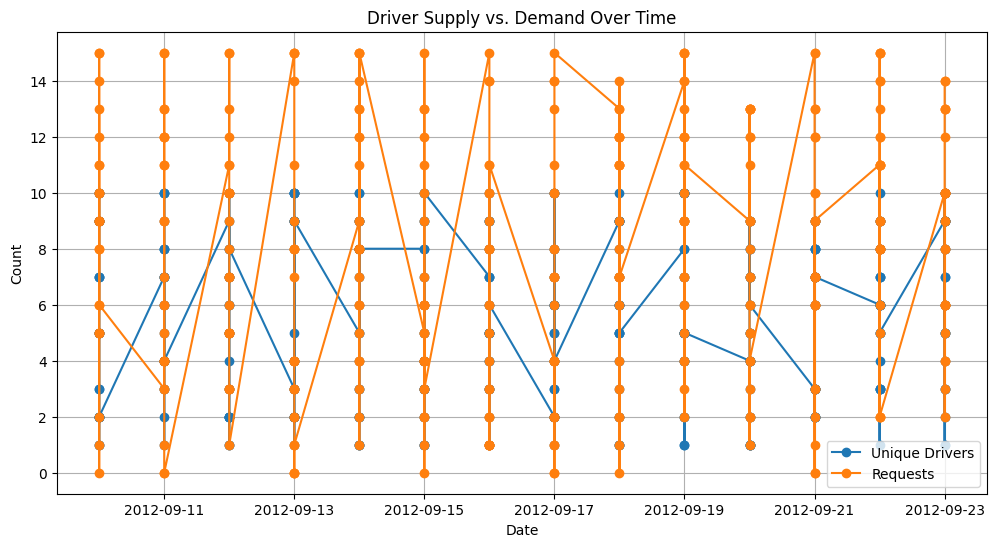

In [19]:
# 7.)    True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.

# Plot driver supply (Unique Drivers) and demand (Requests) over time
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Date'], df_copy['Unique Drivers'], label='Unique Drivers', marker='o')
plt.plot(df_copy['Date'], df_copy['Requests'], label='Requests', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Driver Supply vs. Demand Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The visualization was tough to understand but the general sense is that as that driver supply increases as demand increases. Let's check this further with statistical correlation analysis.

In [20]:
# Calculate the correlation between "Unique Drivers" and "Requests"
correlation = df_copy['Unique Drivers'].corr(df_copy['Requests'])

# Determine whether driver supply increases with demand
if correlation > 0:
    answer = "True"
else:
    answer = "False"

print("Correlation between Unique Drivers and Requests:", correlation)
print("Driver supply always increases when demand increases:", answer)


Correlation between Unique Drivers and Requests: 0.0007644205954573397
Driver supply always increases when demand increases: True


In [21]:
# 8.)   In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

# Calculate the rolling sum of 'Zeroes' and 'Eyeballs' for a 72-hour window
rolling_zeroes = df_copy['Zeroes'].rolling(window=72).sum()
rolling_eyeballs = df_copy['Eyeballs'].rolling(window=72).sum()

# Calculate the ratio of 'Zeroes' to 'Eyeballs' for each period
zeroes_to_eyeballs_ratio = rolling_zeroes / rolling_eyeballs

# Find the period with the highest ratio
highest_ratio_period_start = zeroes_to_eyeballs_ratio.idxmax()
highest_ratio_period_end = highest_ratio_period_start + 72

print("72-hour period with the highest ratio of Zeroes to Eyeballs starts at hour:", highest_ratio_period_start)
print("72-hour period with the highest ratio of Zeroes to Eyeballs ends at hour:", highest_ratio_period_end)


72-hour period with the highest ratio of Zeroes to Eyeballs starts at hour: 138
72-hour period with the highest ratio of Zeroes to Eyeballs ends at hour: 210


In [22]:
# 9.)    If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing

# Calculate the average "rider eyeballs" and "driver supply" for each hour
hourly_avg_eyeballs = df_copy.groupby('Time (Local)')['Eyeballs'].mean()
hourly_avg_drivers = df_copy.groupby('Time (Local)')['Unique Drivers'].mean()

# Calculate the difference between demand and supply for each hour
hourly_demand_supply_difference = hourly_avg_eyeballs - hourly_avg_drivers

# Find the hour with the largest positive difference
best_hour_to_add_drivers = hourly_demand_supply_difference.idxmax()

print("The best hour to add 5 drivers is hour:", best_hour_to_add_drivers)

The best hour to add 5 drivers is hour: 7


In [23]:
# 10.)    True or False: There is exactly two weeks of data in this analysis

# Find the start and end dates in the dataset
start_date = df_copy['Date'].min()
end_date = df_copy['Date'].max()

# Calculate the duration of the dataset in days
dataset_duration = (end_date - start_date).days

# Check if the dataset covers exactly two weeks
is_two_weeks = dataset_duration == 13  # Two weeks is 14 days, but you need to account for day 0

if is_two_weeks:
    answer = "True"
else:
    answer = "False"

print("There is exactly two weeks of data in this analysis:", answer)

There is exactly two weeks of data in this analysis: True


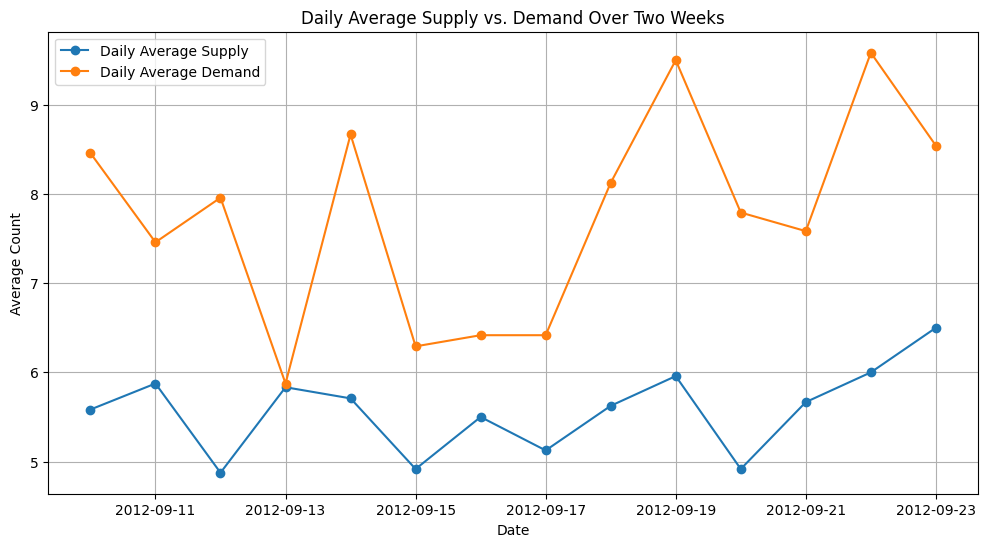

In [24]:
# 11.)  Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.

# Calculate daily averages for both supply (Unique Drivers) and demand (Requests)
daily_avg_supply = df_copy.groupby('Date')['Unique Drivers'].mean()
daily_avg_demand = df_copy.groupby('Date')['Requests'].mean()

# Plot the daily averages for supply and demand
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_supply, label='Daily Average Supply', marker='o')
plt.plot(daily_avg_demand, label='Daily Average Demand', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.title('Daily Average Supply vs. Demand Over Two Weeks')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The true end of day may be considered at noon on 2012-09-11